## Goal: Get to know the data on odds from both DK and archived odds from BetUS

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Gather odds
dk_ml = pd.read_csv('../data/odds/dk_ml_odds.csv')
dk_pl = pd.read_csv('../data/odds/dk_pl_odds.csv')
dk_total = pd.read_csv('../data/odds/dk_total_odds.csv')
betus_ml = pd.read_csv('../data/odds/archived_betus_ml_odds.csv', dtype={'ml_odds':'Int64'})

ml_comb = pd.concat([betus_ml, dk_ml[['date_game', 'team', 'ml_odds']]], axis = 0)

### Q1: Get an idea of the distribution of odds for NHL games
#### Q1.1 - Count of games +100 or longer vs count of games -101 or shorter

In [28]:
# Column for whether odds are positive (1) or negative (-1)
# ML
value_counts = ml_comb['ml_odds'].apply(np.sign).value_counts()
display(value_counts)
display(value_counts.div(value_counts.sum()))

# PL
value_counts = dk_pl['pl_odds'].apply(np.sign).value_counts()
display(value_counts)
display(value_counts.div(value_counts.sum()))

# Total
value_counts = dk_total['total_odds'].apply(np.sign).value_counts()
display(value_counts)
display(value_counts.div(value_counts.sum()))


ml_odds
-1    2949
1     2341
Name: count, dtype: Int64

ml_odds
-1    0.557467
1     0.442533
Name: count, dtype: Float64

pl_odds
-1    498
 1    434
Name: count, dtype: int64

pl_odds
-1    0.534335
 1    0.465665
Name: count, dtype: float64

total_odds
-1    678
 1    254
Name: count, dtype: int64

total_odds
-1    0.727468
 1    0.272532
Name: count, dtype: float64

ML and PL: Sportsbooks want to ensure that they make money. In any close game, both teams will have negative odds. Still roughly even though since the majority of games have a clear underdog.

Total: This is much more skewed. The line is almost always set at a 50/50 chance that leaving the odds to be almost always negative.

#### Q1.2 - What is the range of NHL ml/pl/total odds?

In [39]:
# Maximum odds
display(ml_comb[ml_comb['ml_odds'] == ml_comb['ml_odds'].max()])
display(dk_ml[dk_ml['ml_odds'] == dk_ml['ml_odds'].max()])
display(dk_pl[dk_pl['pl_odds'] == dk_pl['pl_odds'].max()])
display(dk_total[dk_total['total_odds'] == dk_total['total_odds'].max()])

,date_game,team,ml_odds
285,2021-02-02,WPG,760


,date_recorded,time_recorded,game_id,date_game,time_game,team,ml_odds
28,2023-02-15,16:51:02,15,2023-02-15,NaN,CHI,450


,date_recorded,time_recorded,game_id,date_game,time_game,team,pl_line,pl_odds
748,2023-04-02,09:49:24,375,2023-04-02,18:00:00,NJD,-1.5,240


,date_recorded,time_recorded,game_id,date_game,time_game,home,away,bet_type,total_line,total_odds
228,2023-02-28,09:03:23,115,2023-02-28,19:08:00,MIN,NYI,O,5.5,115
297,2023-03-04,10:54:31,149,2023-03-04,18:08:00,WPG,EDM,U,6.5,115
457,2023-03-15,10:18:55,229,2023-03-15,18:00:00,WSH,BUF,U,6.5,115
475,2023-03-16,10:42:19,238,2023-03-16,20:00:00,EDM,DAL,U,6.5,115
498,2023-03-18,11:30:00,250,2023-03-18,15:00:00,SEA,EDM,O,7.0,115
594,2023-03-23,10:57:26,298,2023-03-23,21:00:00,VAN,SJS,O,7.0,115
596,2023-03-24,10:07:38,299,2023-03-24,18:00:00,BUF,NJD,O,7.0,115
629,2023-03-25,10:50:51,315,2023-03-25,21:08:00,EDM,VGK,U,6.5,115
714,2023-04-01,10:27:36,358,2023-04-01,18:00:00,CBJ,FLA,O,7.0,115
762,2023-04-04,08:10:30,382,2023-04-04,18:08:00,TOR,CBJ,O,7.0,115


In [40]:
# Minimum odds
display(ml_comb[ml_comb['ml_odds'] == ml_comb['ml_odds'].min()])
display(dk_ml[dk_ml['ml_odds'] == dk_ml['ml_odds'].min()])
display(dk_pl[dk_pl['pl_odds'] == dk_pl['pl_odds'].min()])
display(dk_total[dk_total['total_odds'] == dk_total['total_odds'].min()])

,date_game,team,ml_odds
284,2021-02-02,CGY,-1210


,date_recorded,time_recorded,game_id,date_game,time_game,team,ml_odds
29,2023-02-15,16:51:02,15,2023-02-15,NaN,TOR,-600


,date_recorded,time_recorded,game_id,date_game,time_game,team,pl_line,pl_odds
60,2023-02-17,10:05:42,31,2023-02-17,19:08:00,DAL,1.5,-315


,date_recorded,time_recorded,game_id,date_game,time_game,home,away,bet_type,total_line,total_odds
229,2023-02-28,09:03:23,115,2023-02-28,19:08:00,MIN,NYI,U,5.5,-145
296,2023-03-04,10:54:31,149,2023-03-04,18:08:00,WPG,EDM,O,6.5,-145


The extremes seem to check out logically except for the following special note...

#### Special Note

In [34]:
ml_comb[ml_comb['ml_odds'] == ml_comb['ml_odds'].max()]

,date_game,team,ml_odds
285,2021-02-02,WPG,760


In [35]:
ml_comb[ml_comb['date_game'] == '2021-02-02']

,date_game,team,ml_odds
278,2021-02-02,DAL,-115
279,2021-02-02,CBJ,-105
280,2021-02-02,VAN,135
281,2021-02-02,MTL,-155
282,2021-02-02,ARI,144
283,2021-02-02,STL,-165
284,2021-02-02,CGY,-1210
285,2021-02-02,WPG,760
286,2021-02-02,CAR,-185
287,2021-02-02,CHI,160


Notice the clear outlier and wrong value here. Calgary was not -1210 pregame and winnipeg was not +760 pregame. We will want to look into this further and make the necessary changes to clean up the BetUS data.

#### Q1.3 - Visualize the distribution of odds above 0 and less than 0

In [106]:
# Function to show 2 histograms for each set of odds
def odds_histogram(odds_list):
    # Separate long and short odds
    long = odds_list[odds_list > 0].astype(int)
    short = odds_list[odds_list <= 0].astype(int)

    long = long.dropna()
    short = short.dropna()

    # Plot both side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(short, ax=ax1)
    sns.histplot(long, ax=ax2)
    plt.tight_layout()

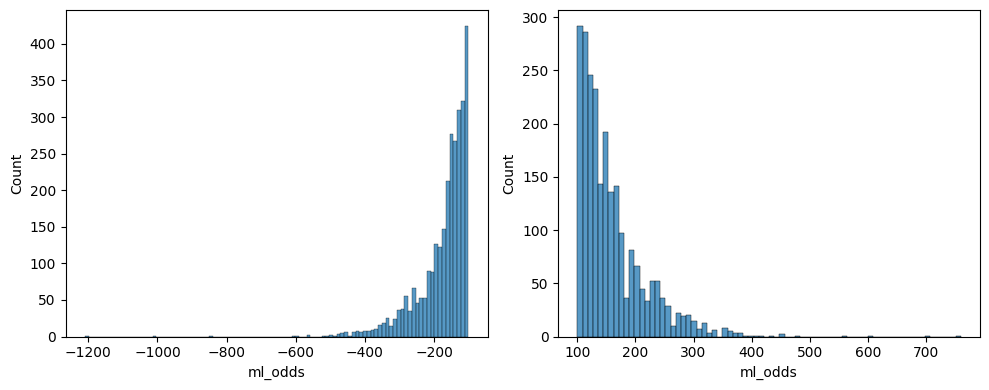

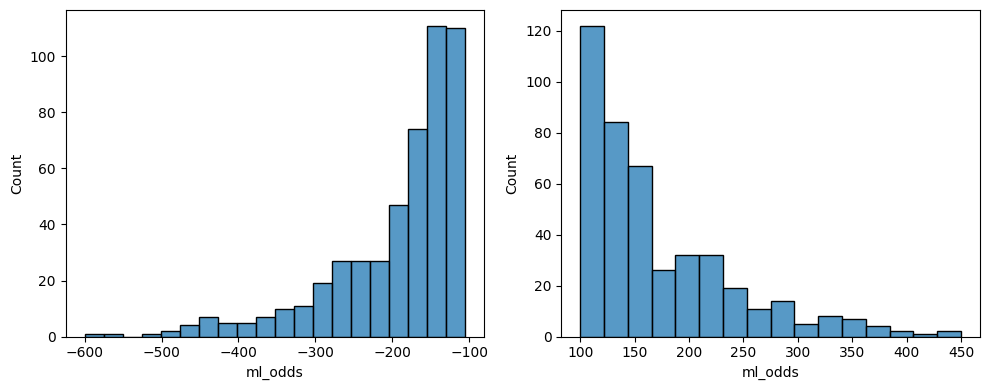

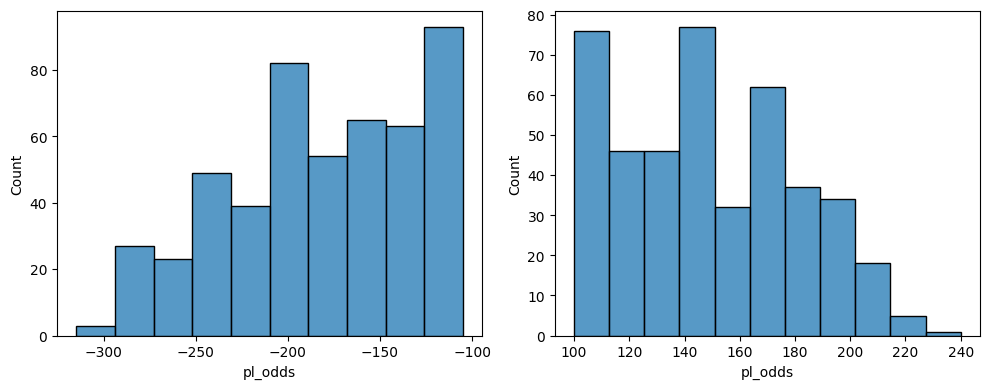

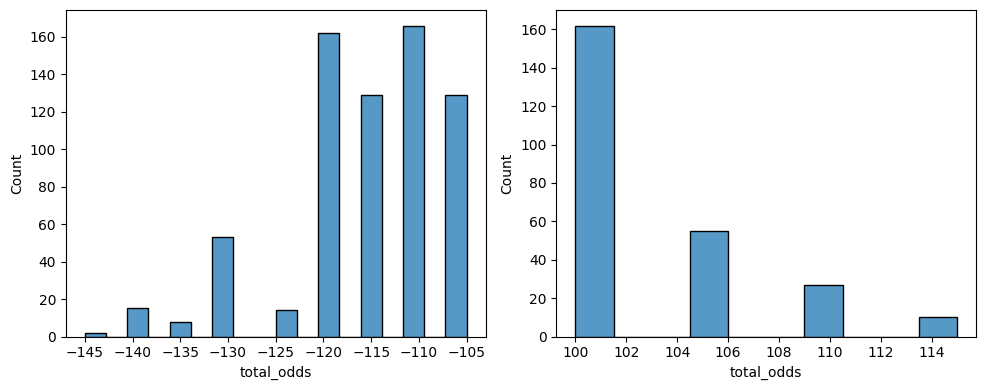

In [108]:
odds_histogram(ml_comb['ml_odds'])
odds_histogram(dk_ml['ml_odds'])
odds_histogram(dk_pl['pl_odds'])
odds_histogram(dk_total['total_odds'])

In [58]:
# Notice that very specific values are chosen for total
dk_total['total_odds'].value_counts()

total_odds
-110    166
-120    162
 100    162
-115    129
-105    129
 105     55
-130     53
 110     27
-140     15
-125     14
 115     10
-135      8
-145      2
Name: count, dtype: int64

We will need to investigate why some odds are shorter than -600 and longer than +450 in the BetUS data. These are likely errors.

#### Q1.4: Which games have strange odds in BetUS data. Should we trust this as a data source?

In [109]:
ml_comb[ml_comb['ml_odds'] < -500]

,date_game,team,ml_odds
284,2021-02-02,CGY,-1210
2939,2022-01-18,PHI,-850
3323,2022-02-20,EDM,-1010
4175,2022-04-19,TBL,-510
4197,2022-04-21,FLA,-610
4291,2022-04-26,MIN,-565
29,2023-02-15,TOR,-600
117,2023-02-21,TBL,-560
751,2023-04-02,CGY,-520


In [110]:
ml_comb[ml_comb['ml_odds'] > 400]

,date_game,team,ml_odds
285,2021-02-02,WPG,760
1802,2021-10-17,DAL,557
2938,2022-01-18,NYI,600
3322,2022-02-20,MIN,705
3532,2022-03-08,FLA,480
4196,2022-04-21,DET,455
4290,2022-04-26,ARI,415
28,2023-02-15,CHI,450
116,2023-02-21,ANA,430
750,2023-04-02,ANA,410


Some of these are clearly wrong. Others are somewhat reasonable. But this also makes me question whether other games from BetUS have innacurate odds despite the values still being in a reasonable range.